# IIR Filter & FIR Filter

#### By Muhammad Arief Mulyana

In [142]:
import numpy as np
from scipy.signal import tf2zpk, zpk2tf, residue, convolve, lfilter
import matplotlib.pyplot as plt

## IIR Filter Experiment 1

#### Initialize the a & b coeffiecients

In [143]:
b = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
a = [1, -1/3, -1/9, -1/27, -1/81, -1/243]

### IIR Filter Direct and Cascade Form

b0: 1.0

B: [[1.      0.5     0.25    0.125   0.0625  0.03125]]

A: [[ 1.         -0.33333333 -0.11111111 -0.03703704 -0.01234568 -0.00411523]]

hcas: [1.         1.83333333 2.47222222 2.93981481 3.27237654 3.50450103
 3.64746228 3.74162666 3.80352652 3.84415168 3.87077893 3.88821201
 3.89963797 3.9071261  3.91203327 3.915249   3.91735629 3.91873723
 3.91964219 3.92023523 3.92062385 3.92087852 3.92104541 3.92115478
 3.92122645 3.92127341 3.92130419 3.92132436 3.92133758 3.92134624
 3.92135191 3.92135563 3.92135807 3.92135967 3.92136071 3.9213614
 3.92136185 3.92136214 3.92136234 3.92136246 3.92136255 3.9213626
 3.92136264 3.92136266 3.92136268 3.92136269 3.92136269 3.9213627
 3.9213627  3.9213627  3.9213627  3.9213627  3.9213627  3.9213627
 3.9213627  3.9213627  3.9213627  3.9213627  3.9213627  3.9213627
 3.9213627  3.9213627  3.9213627  3.9213627  3.9213627  3.9213627
 3.9213627  3.9213627  3.9213627  3.9213627  3.9213627  3.9213627
 3.9213627  3.9213627  3.9213627  3.9213627  3.92136

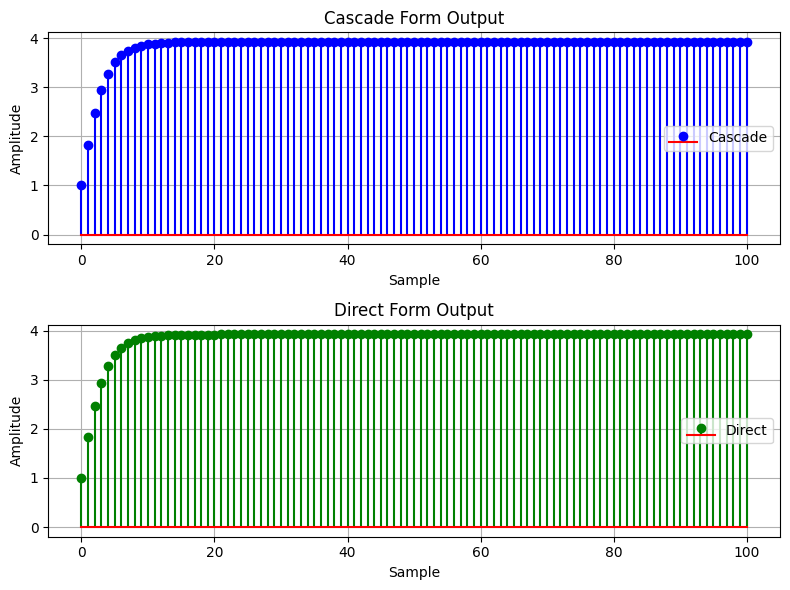

In [144]:
def dir2cas(b, a):
    b = np.array(b, dtype=float)
    a = np.array(a, dtype=float)
    b0 = b[0] / a[0]
    b = b / b[0]
    a = a / a[0]

    z, p, k = tf2zpk(b, a)
    z = np.sort_complex(z)
    p = np.sort_complex(p)
    B = []
    A = []

    for i in range(0, len(z), 5):
        b_poly = np.poly(z[i:i+5])
        B.append(np.real(b_poly))
    for i in range(0, len(p), 5):
        a_poly = np.poly(p[i:i+5])
        A.append(np.real(a_poly))

    return b0, np.array(B), np.array(A)

b0, B, A = dir2cas(b, a)
print(f"b0: {b0}")
print()
print(f"B: {B}")
print()
print(f"A: {A}")

def casfiltr(b0, B, A, x):
    K, _ = B.shape
    N = len(x)
    w = np.zeros((K + 1, N))
    w[0, :] = lfilter([b0], [1], x)

    for i in range(K):
        w[i + 1, :] = lfilter(B[i], A[i], w[i, :])

    y = w[-1, :]
    return y

n = np.arange(0, 101)
u = np.ones_like(n)

hcas = casfiltr(b0, B, A, u)
print()
print(f"hcas: {hcas}")

hdir = lfilter(b, a, u)
print()
print(f"hdir: {hdir}")

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(hcas, linefmt="b-", markerfmt="bo", basefmt="r-", label="Cascade")
axs[0].set_title("Cascade Form Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(hdir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct")
axs[1].set_title("Direct Form Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

### IIR Filter Direct and Parallel Form

C:\Users\marie\AppData\Local\Temp\ipykernel_15272\1461303445.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  B[i, :] = Brow


C: [1.]
B: [[-0.37811173 -0.37811173]
 [ 0.19783373  0.19783373]]
A: [[ 1.          0.45224     0.07449338]
 [ 1.         -0.13026     0.08430262]]
hpar: [0.819722   0.83621107 0.97049204 0.91359447 0.9191649  0.91913465
 0.91936181 0.91949068 0.91939238 0.91940489 0.91940559 0.9194061
 0.91940613 0.91940597 0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.919406
 0.919406   0.919406   0.919406   0.919406   0.919406   0.91940

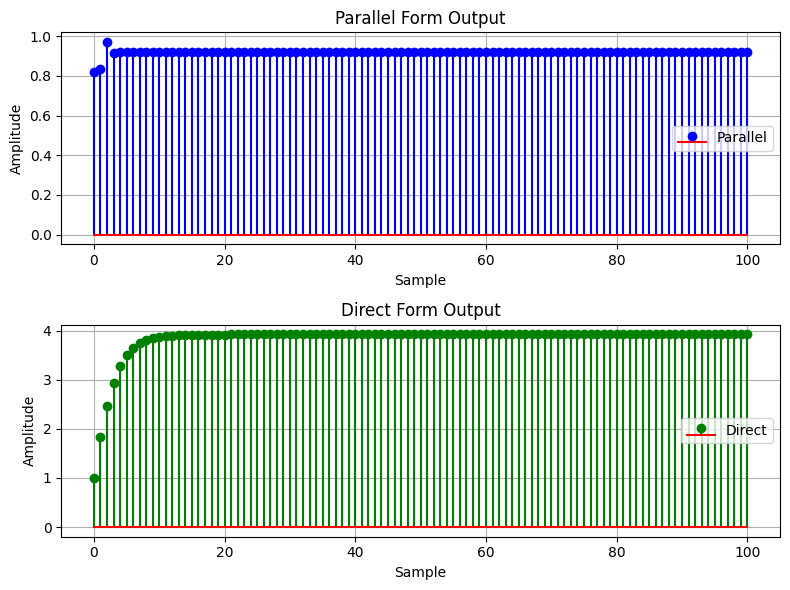

In [145]:
def cplxpair(p, tol=1e-8):
    p = np.array(p, dtype=complex)
    sorted_indices = np.argsort(np.abs(p))
    p_sorted = p[sorted_indices]

    pairs = []
    used = np.zeros(len(p_sorted), dtype=bool)

    for i in range(len(p_sorted)):
        if not used[i]:
            pair = [p_sorted[i]]
        for j in range(i + 1, len(p_sorted)):
            if not used[j] and np.isclose(np.real(p[j]), np.real(p[i]), atol=tol) and np.isclose(np.imag(p[j]), -np.imag(p[i]), atol=tol):
                pair.append(p_sorted[j])
                used[j] = True
                break
        pairs.extend(pair)
    return np.array(pairs)

def cplxcomp(p1, p2):
    I = []
    for j in range(len(p2)):
        for i in range(len(p1)):
            if np.isclose(p1[i], p2[j], atol=1e-4):
                I.append(i)
    return np.array(I)

def dir2par(b, a):
    r, p, C = residue(b, a)

    p = np.array(p, dtype=complex)
    p_conjugates = np.array([np.conj(p[i]) for i in range(len(p))])
    p_all = np.concatenate((p, p_conjugates))

    p_sorted = np.unique(np.round(p_all, decimals=5))

    I = cplxcomp(p, p_sorted)
    r = r[I]

    K = len(p_sorted) // 2
    B = np.zeros((K, 2))
    A = np.zeros((K, 3))

    for i in range(K):
        if i * 2 + 1 < len(p_sorted):
            Brow = r[i * 2:i * 2 + 2]
            Arow = np.poly([p_sorted[i * 2], p_sorted[i * 2 + 1]])
            B[i, :] = Brow
            A[i, :] = Arow
        else:
            Brow = [r[-1], 0]
            Arow = np.poly([p_sorted[-1]])
            B[i, :] = Brow
            A[i, :] = np.append(Arow, [0])

    if isinstance(C, np.ndarray) and C.size == 0:
        C = np.array([1.0])

        B = np.array(B)
        A = np.array(A)

    return C, B, A

def parfiltr(C, B, A, x):
    K = len(B)
    N = len(x)
    w = np.zeros((K + 1, N))

    w[0, :] = lfilter(C, [1], x)

    for i in range(K):
        w[i + 1, :] = lfilter(B[i, :], A[i, :], x)
    y = np.sum(w, axis=0)
    return y

C, B, A = dir2par(b, a)
print("C:", C)
print("B:", B)
print("A:", A)

n = np.arange(0, 101)
u = np.ones_like(n)

hpar = parfiltr(C, B, A, u)
print("hpar:", hpar)

hdir = lfilter(b, a, u)
print("hdir:", hdir)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(hpar, linefmt="b-", markerfmt="bo", basefmt="r-", label="Parallel")
axs[0].set_title("Parallel Form Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(hdir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct")
axs[1].set_title("Direct Form Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

### IIR Filter Direct and Lattice-Ladder Form

b0 (gain): 1.0
Lattice Reflection Coefficients (k): [0.28638187 0.1091456  0.03709287 0.01256384 0.0047125 ]
Ladder Coefficients (b): [1.      0.5     0.25    0.125   0.0625  0.03125]
Lattice-Ladder Output: [1.17589918 1.38456621 1.46729681 1.50977124 1.52359006 1.50213106
 1.50348443 1.5041014  1.50423022 1.50429155 1.50431303 1.5042784
 1.50427972 1.50428115 1.50428137 1.50428145 1.50428149 1.50428143
 1.50428143 1.50428143 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144
 1.50428144 1.50428144 1.50428144 1.50428144 1.50428144 1

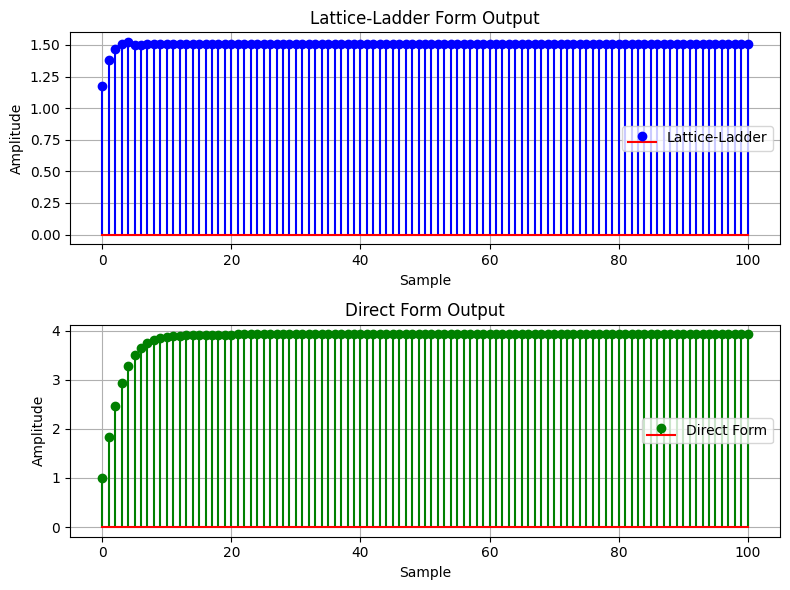

In [146]:
def levinson_durbin(a):
    """
    Levinson-Durbin recursion to calculate lattice reflection coefficients (Lattice).
    Input:
        a: Denominator polynomial coefficients of the direct form.
    Output:
        k: Reflection coefficients (lattice coefficients).
        v: Final prediction error.
    """
    N = len(a) - 1
    k = np.zeros(N)
    v = np.zeros(N + 1)
    v[0] = a[0]

    for n in range(1, N + 1):
        k[n - 1] = -a[n] / v[0]
        v[0] += a[n] * k[n - 1]
        for i in range(1, n):
            k[i - 1] = k[i - 1] + k[n - 1] * a[n - i]
    
    return k

def dir2latlad(b, a):
    """
    Convert direct form coefficients (b, a) into a lattice-ladder form.
    The lattice section will be defined by reflection coefficients from 'a'.
    The ladder section will be defined by the numerator 'b'.
    """
    # Normalize coefficients
    b = np.array(b, dtype=float)
    a = np.array(a, dtype=float)
    b0 = b[0] / a[0]
    b = b / b[0]
    a = a / a[0]

    # Get reflection coefficients (lattice) from denominator
    k = levinson_durbin(a)

    # Use the numerator coefficients directly as ladder coefficients
    return b0, k, b

def lattice_ladder_filter(b0, k, b, x):
    """
    Apply Lattice-Ladder filter.
    Input:
        b0: Gain factor
        k: Lattice reflection coefficients
        b: Ladder coefficients
        x: Input signal
    Output:
        y: Filtered output signal
    """
    N = len(x)
    L = len(k)

    # Initialize signal buffers
    w = np.zeros(L)
    v = np.zeros(L)
    y = np.zeros(N)

    # Loop through each input sample
    for n in range(N):
        # Lattice section (recursive)
        w_new = x[n] - sum(k[i] * w[i] for i in range(L))
        for i in range(L-1, 0, -1):
            w[i] = w[i-1] + k[i-1] * w_new
        w[0] = w_new

        # Ladder section (feedforward)
        y[n] = b0 * (w[0] + sum(b[i] * w[i] for i in range(1, L)))

    return y

# Convert to Lattice-Ladder form
b0, k, b_ladder = dir2latlad(b, a)
print(f"b0 (gain): {b0}")
print(f"Lattice Reflection Coefficients (k): {k}")
print(f"Ladder Coefficients (b): {b_ladder}")

# Define input signal (step response)
n = np.arange(0, 101)
u = np.ones_like(n)

# Filter using the lattice-ladder filter
hlatlad = lattice_ladder_filter(b0, k, b_ladder, u)
print(f"Lattice-Ladder Output: {hlatlad}")

# Direct form filtering for comparison
hdir = lfilter(b, a, u)
print(f"Direct Form Output: {hdir}")

# Plot both Lattice-Ladder and Direct form output
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(hlatlad, linefmt="b-", markerfmt="bo", basefmt="r-", label="Lattice-Ladder")
axs[0].set_title("Lattice-Ladder Form Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(hdir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct Form")
axs[1].set_title("Direct Form Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

## IIR Filter Experiment 2

#### Initialize a & b coefficients

In [147]:
b = [4, 6, 4, 4, 0, -2]
a = [1, -1.55, 2.04, 1.72, 0.992, -0.384]

### IIR Filter Direct and Cascade Form

b0: 4.0

B: [[ 1.0000000e+00  1.5000000e+00  1.0000000e+00  1.0000000e+00
   8.8817842e-16 -5.0000000e-01]]

A: [[ 1.    -1.55   2.04   1.72   0.992 -0.384]]

hcas: [ 4.00000000e+00  1.62000000e+01  3.09500000e+01  2.60445000e+01
 -3.66010250e+01 -1.61630769e+02 -2.29139741e+02  3.95625894e+01
  8.69081311e+02  1.82277163e+03  1.16556291e+03 -3.51788723e+03
 -1.17965774e+04 -1.45714354e+04  7.08976486e+03  6.49582972e+04
  1.21652445e+05  5.37929467e+04 -2.89132670e+05 -8.28835617e+05
 -8.83107667e+05  8.12683903e+05  4.79428905e+06  8.00341204e+06
  1.78490861e+06 -2.29518092e+07 -5.74262346e+07 -5.13573775e+07
  7.83253921e+07  3.48400147e+08  5.16724463e+08 -1.56381956e+07
 -1.77502537e+09 -3.92368946e+09 -2.81257421e+09  6.91181540e+09
  2.49545312e+10  3.26277378e+10 -1.09391957e+10 -1.34374682e+11
 -2.64185264e+11 -1.39331568e+11  5.77479193e+11  1.76282684e+12
  2.00444624e+12 -1.44576951e+12 -9.98843791e+12 -1.75073287e+13
 -5.58470780e+12  4.64426774e+13  1.22844914e+14  1.188

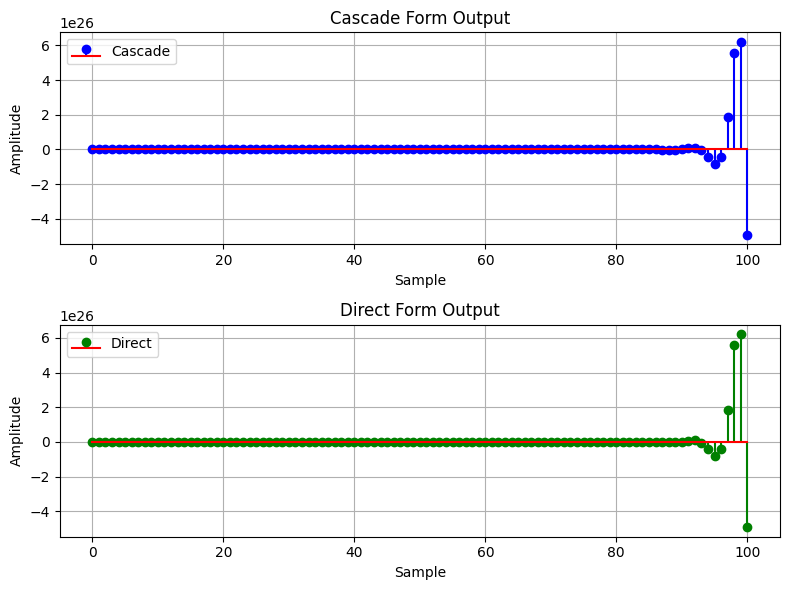

In [148]:
def dir2cas(b, a):
    b = np.array(b, dtype=float)
    a = np.array(a, dtype=float)
    b0 = b[0] / a[0]
    b = b / b[0]
    a = a / a[0]

    z, p, k = tf2zpk(b, a)
    z = np.sort_complex(z)
    p = np.sort_complex(p)
    B = []
    A = []

    for i in range(0, len(z), 5):
        b_poly = np.poly(z[i:i+5])
        B.append(np.real(b_poly))
    for i in range(0, len(p), 5):
        a_poly = np.poly(p[i:i+5])
        A.append(np.real(a_poly))

    return b0, np.array(B), np.array(A)

b0, B, A = dir2cas(b, a)
print(f"b0: {b0}")
print()
print(f"B: {B}")
print()
print(f"A: {A}")

def casfiltr(b0, B, A, x):
    K, _ = B.shape
    N = len(x)
    w = np.zeros((K + 1, N))
    w[0, :] = lfilter([b0], [1], x)

    for i in range(K):
        w[i + 1, :] = lfilter(B[i], A[i], w[i, :])

    y = w[-1, :]
    return y

n = np.arange(0, 101)
u = np.ones_like(n)

hcas = casfiltr(b0, B, A, u)
print()
print(f"hcas: {hcas}")

hdir = lfilter(b, a, u)
print()
print(f"hdir: {hdir}")

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(hcas, linefmt="b-", markerfmt="bo", basefmt="r-", label="Cascade")
axs[0].set_title("Cascade Form Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(hdir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct")
axs[1].set_title("Direct Form Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

### IIR Filter Direct and Parallel Form

C:\Users\marie\AppData\Local\Temp\ipykernel_15272\1461303445.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  B[i, :] = Brow
C:\Users\marie\AppData\Local\Temp\ipykernel_15272\1461303445.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  A[i, :] = Arow


C: [4.]
B: [[ 0.61756082  0.61756082]
 [-0.76684522  5.86586179]]
A: [[ 1.          0.94096     0.45471772]
 [ 1.         -1.37087     0.28090486]]
hpar: [3.85071560e+00 8.70179308e+00 1.52022932e+01 2.34731183e+01
 3.23929218e+01 4.25265368e+01 5.39666479e+01 6.66481445e+01
 8.09404403e+01 9.69273883e+01 1.14814592e+02 1.34877873e+02
 1.57332698e+02 1.82487701e+02 2.10667768e+02 2.42225780e+02
 2.77576821e+02 3.17172172e+02 3.61521128e+02 4.11196745e+02
 4.66836701e+02 5.29158006e+02 5.98963079e+02 6.77150087e+02
 7.64725931e+02 8.62817868e+02 9.72688634e+02 1.09575274e+03
 1.23359435e+03 1.38798798e+03 1.56092121e+03 1.75462026e+03
 1.97157869e+03 2.21458949e+03 2.48678102e+03 2.79165731e+03
 3.13314315e+03 3.51563461e+03 3.94405565e+03 4.42392148e+03
 4.96140960e+03 5.56343929e+03 6.23776071e+03 6.99305464e+03
 7.83904427e+03 8.78662034e+03 9.84798134e+03 1.10367906e+04
 1.23683520e+04 1.38598073e+04 1.55303566e+04 1.74015055e+04
 1.94973419e+04 2.18448463e+04 2.44742391e+04 2.74193

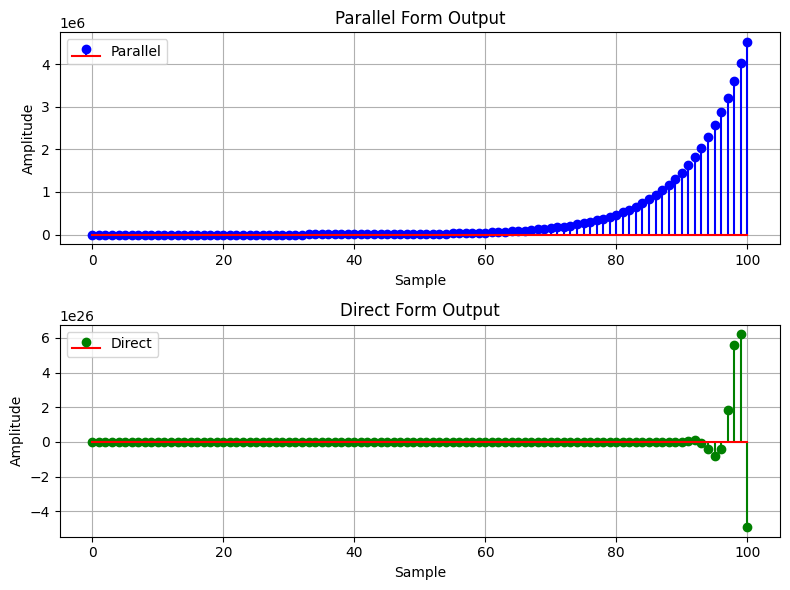

In [149]:
def cplxpair(p, tol=1e-8):
    p = np.array(p, dtype=complex)
    sorted_indices = np.argsort(np.abs(p))
    p_sorted = p[sorted_indices]

    pairs = []
    used = np.zeros(len(p_sorted), dtype=bool)

    for i in range(len(p_sorted)):
        if not used[i]:
            pair = [p_sorted[i]]
        for j in range(i + 1, len(p_sorted)):
            if not used[j] and np.isclose(np.real(p[j]), np.real(p[i]), atol=tol) and np.isclose(np.imag(p[j]), -np.imag(p[i]), atol=tol):
                pair.append(p_sorted[j])
                used[j] = True
                break
        pairs.extend(pair)
    return np.array(pairs)

def cplxcomp(p1, p2):
    I = []
    for j in range(len(p2)):
        for i in range(len(p1)):
            if np.isclose(p1[i], p2[j], atol=1e-4):
                I.append(i)
    return np.array(I)

def dir2par(b, a):
    r, p, C = residue(b, a)

    p = np.array(p, dtype=complex)
    p_conjugates = np.array([np.conj(p[i]) for i in range(len(p))])
    p_all = np.concatenate((p, p_conjugates))

    p_sorted = np.unique(np.round(p_all, decimals=5))

    I = cplxcomp(p, p_sorted)
    r = r[I]

    K = len(p_sorted) // 2
    B = np.zeros((K, 2))
    A = np.zeros((K, 3))

    for i in range(K):
        if i * 2 + 1 < len(p_sorted):
            Brow = r[i * 2:i * 2 + 2]
            Arow = np.poly([p_sorted[i * 2], p_sorted[i * 2 + 1]])
            B[i, :] = Brow
            A[i, :] = Arow
        else:
            Brow = [r[-1], 0]
            Arow = np.poly([p_sorted[-1]])
            B[i, :] = Brow
            A[i, :] = np.append(Arow, [0])

    if isinstance(C, np.ndarray) and C.size == 0:
        C = np.array([1.0])

        B = np.array(B)
        A = np.array(A)

    return C, B, A

def parfiltr(C, B, A, x):
    K = len(B)
    N = len(x)
    w = np.zeros((K + 1, N))

    w[0, :] = lfilter(C, [1], x)

    for i in range(K):
        w[i + 1, :] = lfilter(B[i, :], A[i, :], x)
    y = np.sum(w, axis=0)
    return y

C, B, A = dir2par(b, a)
print("C:", C)
print("B:", B)
print("A:", A)

n = np.arange(0, 101)
u = np.ones_like(n)

hpar = parfiltr(C, B, A, u)
print("hpar:", hpar)

hdir = lfilter(b, a, u)
print("hdir:", hdir)

fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(hpar, linefmt="b-", markerfmt="bo", basefmt="r-", label="Parallel")
axs[0].set_title("Parallel Form Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(hdir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct")
axs[1].set_title("Direct Form Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

### IIR Filter Direct and Lattice-Ladder Form

b0 (gain): 4.0
Lattice Reflection Coefficients (k): [ 2.430699    9.61386713 -5.52712147  2.82338837  0.1425333 ]
Ladder Coefficients (b): [ 1.   1.5  1.   1.   0.  -0.5]
Lattice-Ladder Output: [3.49311767e+001 1.57510541e+003 6.63217119e+004 2.78588798e+006
 1.17014741e+008 4.91492221e+009 2.06439453e+011 8.67099129e+012
 3.64204075e+014 1.52975137e+016 6.42535165e+017 2.69881398e+019
 1.13357172e+021 4.76129458e+022 1.99986695e+024 8.39995875e+025
 3.52820006e+027 1.48193534e+029 6.22451194e+030 2.61445611e+032
 1.09813923e+034 4.61246895e+035 1.93735633e+037 8.13739797e+038
 3.41791774e+040 1.43561391e+042 6.02994995e+043 2.53273504e+045
 1.06381426e+047 4.46829522e+048 1.87679963e+050 7.88304416e+051
 3.31108256e+053 1.39074037e+055 5.84146946e+056 2.45356835e+058
 1.03056221e+060 4.32862798e+061 1.81813577e+063 7.63664079e+064
 3.20758677e+066 1.34726945e+068 5.65888038e+069 2.37687621e+071
 9.98349523e+072 4.19332637e+074 1.76130560e+076 7.39793934e+077
 3.10732598e+079 1.3051573

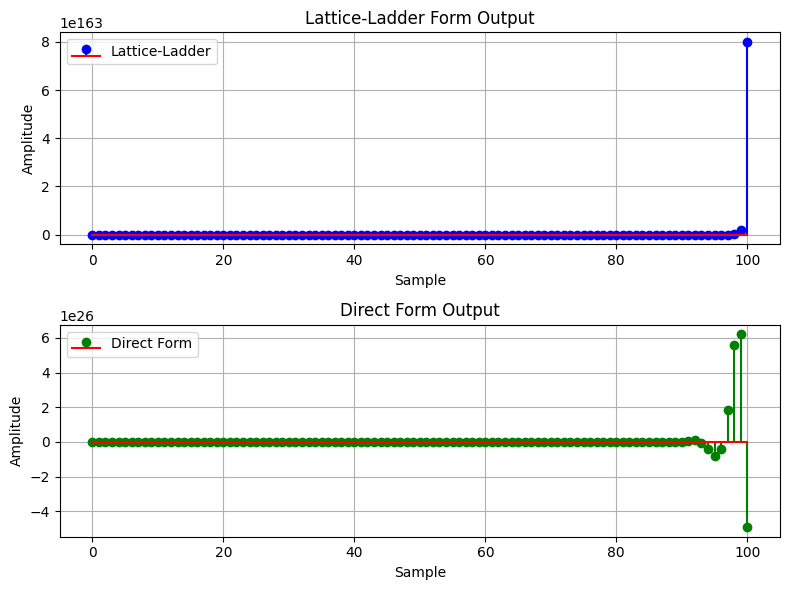

In [150]:
def levinson_durbin(a):
    """
    Levinson-Durbin recursion to calculate lattice reflection coefficients (Lattice).
    Input:
        a: Denominator polynomial coefficients of the direct form.
    Output:
        k: Reflection coefficients (lattice coefficients).
        v: Final prediction error.
    """
    N = len(a) - 1
    k = np.zeros(N)
    v = np.zeros(N + 1)
    v[0] = a[0]

    for n in range(1, N + 1):
        k[n - 1] = -a[n] / v[0]
        v[0] += a[n] * k[n - 1]
        for i in range(1, n):
            k[i - 1] = k[i - 1] + k[n - 1] * a[n - i]
    
    return k

def dir2latlad(b, a):
    """
    Convert direct form coefficients (b, a) into a lattice-ladder form.
    The lattice section will be defined by reflection coefficients from 'a'.
    The ladder section will be defined by the numerator 'b'.
    """
    # Normalize coefficients
    b = np.array(b, dtype=float)
    a = np.array(a, dtype=float)
    b0 = b[0] / a[0]
    b = b / b[0]
    a = a / a[0]

    # Get reflection coefficients (lattice) from denominator
    k = levinson_durbin(a)

    # Use the numerator coefficients directly as ladder coefficients
    return b0, k, b

def lattice_ladder_filter(b0, k, b, x):
    """
    Apply Lattice-Ladder filter.
    Input:
        b0: Gain factor
        k: Lattice reflection coefficients
        b: Ladder coefficients
        x: Input signal
    Output:
        y: Filtered output signal
    """
    N = len(x)
    L = len(k)

    # Initialize signal buffers
    w = np.zeros(L)
    v = np.zeros(L)
    y = np.zeros(N)

    # Loop through each input sample
    for n in range(N):
        # Lattice section (recursive)
        w_new = x[n] - sum(k[i] * w[i] for i in range(L))
        for i in range(L-1, 0, -1):
            w[i] = w[i-1] + k[i-1] * w_new
        w[0] = w_new

        # Ladder section (feedforward)
        y[n] = b0 * (w[0] + sum(b[i] * w[i] for i in range(1, L)))

    return y

# Convert to Lattice-Ladder form
b0, k, b_ladder = dir2latlad(b, a)
print(f"b0 (gain): {b0}")
print(f"Lattice Reflection Coefficients (k): {k}")
print(f"Ladder Coefficients (b): {b_ladder}")

# Define input signal (step response)
n = np.arange(0, 101)
u = np.ones_like(n)

# Filter using the lattice-ladder filter
hlatlad = lattice_ladder_filter(b0, k, b_ladder, u)
print(f"Lattice-Ladder Output: {hlatlad}")

# Direct form filtering for comparison
hdir = lfilter(b, a, u)
print(f"Direct Form Output: {hdir}")

# Plot both Lattice-Ladder and Direct form output
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(hlatlad, linefmt="b-", markerfmt="bo", basefmt="r-", label="Lattice-Ladder")
axs[0].set_title("Lattice-Ladder Form Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(hdir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct Form")
axs[1].set_title("Direct Form Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

## FIR Filter Experiment 1

#### Initialize a & b coefficients

In [151]:
b = np.array([1/32, 1/16, 1/8, 1/4, 1/2, 1, 1/2, 1/4, 1/8, 1/16, 1/32])
a = np.array([1])

### FIR Filter Direct and Cascade Form

b0: 0.03125
B: [[ 1.         -0.55059283  0.26463067]
 [ 1.          0.50461639  0.28842818]
 [ 1.          2.37704577  1.        ]
 [ 1.          1.74953918  3.46706765]
 [ 1.         -2.08060852  3.77885146]]
h_cas: [0.03125 0.09375 0.21875 0.46875 0.96875 1.96875 2.46875 2.71875 2.84375
 2.90625 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375
 2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.9375  2.93

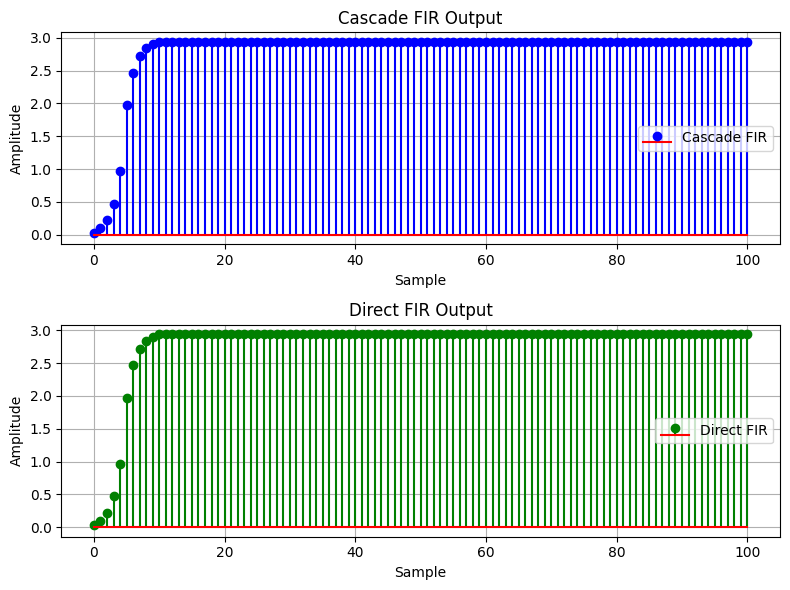

In [152]:
def cplxpair(zeros, tol=1e-8):
    zeros = np.array(zeros, dtype=complex)
    sorted_indices = np.argsort(np.abs(zeros))
    zeros_sorted = zeros[sorted_indices]
    real_parts = np.real(zeros_sorted)
    imag_parts = np.imag(zeros_sorted)

    pairs = []
    used = np.zeros(len(zeros_sorted), dtype=bool)

    for i in range(len(zeros_sorted)):
        if not used[i]:
            pair = [zeros_sorted[i]]
            for j in range(i + 1, len(zeros_sorted)):
                if not used[j] and abs(real_parts[j] - real_parts[i]) < tol and abs(imag_parts[j] + imag_parts[i]) < tol:
                    pair.append(zeros_sorted[j])
                    used[j] = True
                    break
            pairs.extend(pair)
    return np.array(pairs)

def dir2cas(b):
    b0 = b[0]
    b = b / b0
    b0 = b0  # Normalize the gain

    roots = cplxpair(np.roots(b))

    K = len(roots) // 2  # Number of second-order sections
    B = np.zeros((K, 3))  # Coefficients for the numerator
    A = np.zeros((K, 1))  # No denominator coefficients for FIR

    for i in range(0, 2 * K, 2):
        Brow = np.poly(roots[i:i+2])  # Coefficients of the polynomial formed by roots
        B[i // 2, :] = np.real(Brow)

    return b0, B

b0, B = dir2cas(b)
print("b0:", b0)
print("B:", B)

def cas_filter(b0, B, x):
    K = len(B)
    N = len(x)
    w = np.zeros((K + 1, N))
    w[0, :] = lfilter([b0], [1], x)

    for i in range(K):
        w[i + 1, :] = lfilter(B[i, :], [1], w[i, :])  # FIR sections only have a numerator
    y = w[-1, :]
    return y

n = np.arange(0, 101)
u = np.ones_like(n)  # Input signal (step function)

# Apply the cascade FIR filter
h_cas = cas_filter(b0, B, u)
print("h_cas:", h_cas)

# Direct FIR filter output for comparison
h_dir = lfilter(b, [1], u)
print("h_dir:", h_dir)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(h_cas, linefmt="b-", markerfmt="bo", basefmt="r-", label="Cascade FIR")
axs[0].set_title("Cascade FIR Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(h_dir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct FIR")
axs[1].set_title("Direct FIR Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

### FIR Filter Linear Phase Form

The array b is symmetric.
x = [1 1 1 1 1 1 1 1 1 1 1] 
y = [0.03125 0.09375 0.21875 0.46875 0.96875 1.96875 2.46875 2.71875 2.84375
 2.90625 2.9375 ]


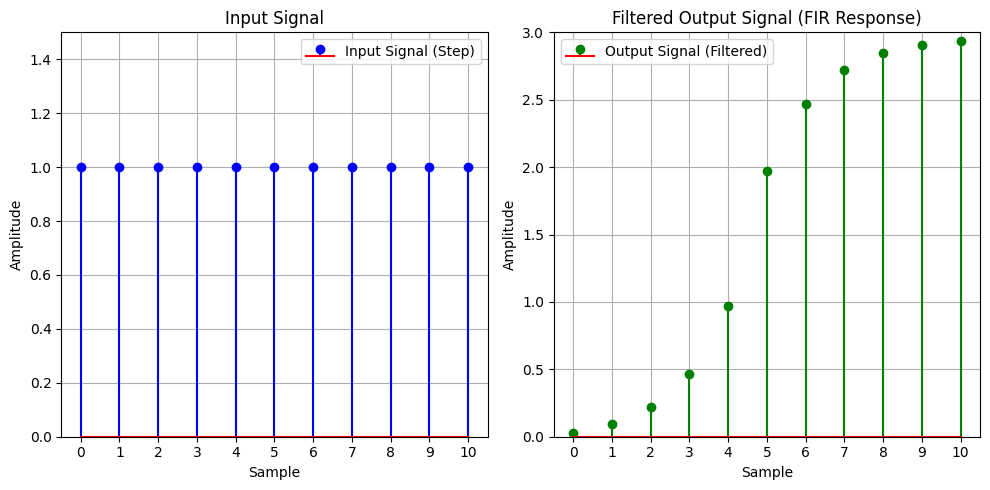

In [153]:
# FIR filter function
def fir_filter(b, x):
    return lfilter(b, 1, x)

# Function to check symmetry and make the array symmetric if it's not
def make_symmetric(b):
    if np.allclose(b, b[::-1]):
        print("The array b is symmetric.")
    else:
        print("The array b is not symmetric. Making it symmetric...")
        # Average the coefficients with their corresponding reverse pair
        b = (b + b[::-1]) / 2
        print("New symmetric array b:", b)
    return b

# Check and make b symmetric if necessary
b = make_symmetric(b)
# Input signal
n = np.arange(11)  # 0 to 10
x = np.ones_like(n)  # Step input (constant value of 1)

# Apply FIR filter
y = fir_filter(b, x)

print("x =", x, "\ny =", y)

# Creating a figure and axis for the plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the input signal
axs[0].stem(n, x, linefmt='b-', markerfmt='bo', basefmt='r-', label='Input Signal (Step)')
axs[0].set_title('Input Signal')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Amplitude')
axs[0].set_xticks(n)
axs[0].set_ylim(0, 1.5)
axs[0].grid()
axs[0].legend()

# Plotting the filtered output signal
axs[1].stem(n, y[:len(n)], linefmt='g-', markerfmt='go', basefmt='r-', label='Output Signal (Filtered)')
axs[1].set_title('Filtered Output Signal (FIR Response)')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Amplitude')
axs[1].set_xticks(n)
axs[1].set_ylim(0, 3)
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()


### Cascade Form of Linear Phase FIR Filter

The array b is symmetric.
Roots from polynomial coefficients of FIR filter:
 [-1.83085197+0.j         -0.87476959-1.64372924j -0.87476959+1.64372924j
 -0.5461938 +0.j         -0.2523082 -0.47409783j -0.2523082 +0.47409783j
  0.27529641-0.43456019j  0.27529641+0.43456019j  1.04030426-1.6421384j
  1.04030426+1.6421384j ]
B1: [ 1.          4.37889315  9.66697356 12.16727831  5.98785807  0.87476959]
B2: [ 1.         -2.37889315  4.52517659 -1.32196143  0.33612633  0.2523082 ]


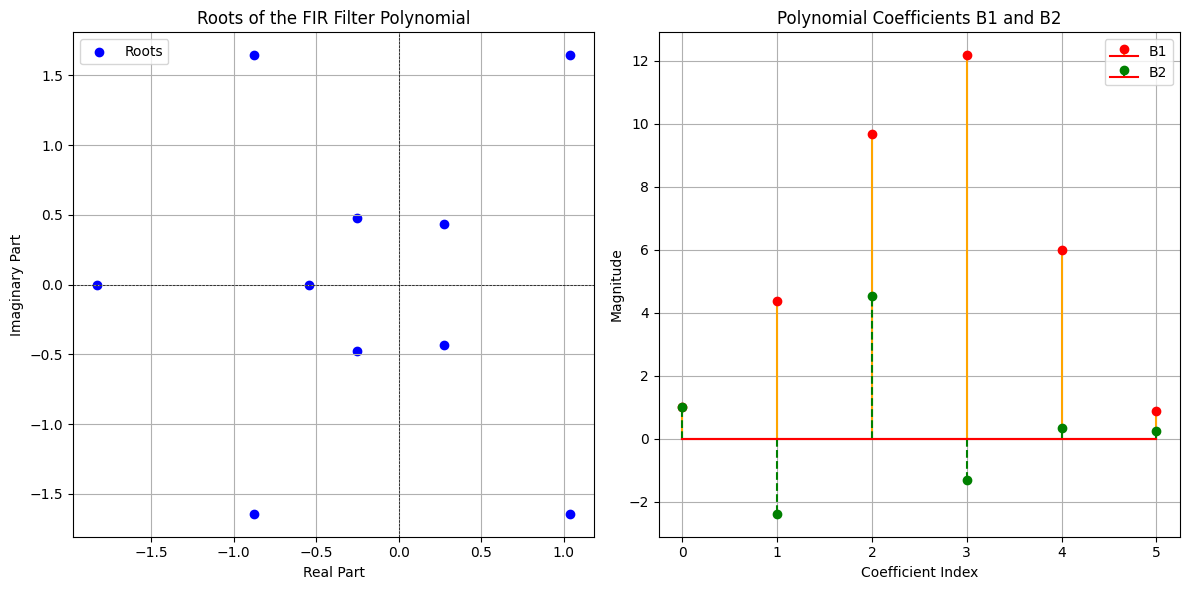

In [154]:
# Function to check symmetry and make the array symmetric if it's not
def make_symmetric(b):
    if np.allclose(b, b[::-1]):
        print("The array b is symmetric.")
    else:
        print("The array b is not symmetric. Making it symmetric...")
        # Average the coefficients with their corresponding reverse pair
        b = (b + b[::-1]) / 2
        print("New symmetric array b:", b)
    return b

# Check and make b symmetric if necessary
b = make_symmetric(b)

# Calculate roots of the polynomial
broots = np.roots(b)
broots = np.sort_complex(broots)

# Print the roots
print("Roots from polynomial coefficients of FIR filter:\n", broots)

# Split the roots into two halves
B1 = np.poly(broots[:len(broots)//2]).real
B2 = np.poly(broots[len(broots)//2:]).real

# Print the polynomial coefficients
print("B1:", B1)
print("B2:", B2)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the roots on the complex plane
plt.subplot(1, 2, 1)
plt.scatter(broots.real, broots.imag, color='blue', marker='o', label='Roots')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title("Roots of the FIR Filter Polynomial")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid()
plt.legend()

# Plot the polynomial coefficients
plt.subplot(1, 2, 2)
plt.stem(range(len(B1)), B1, linefmt='orange', markerfmt='or', basefmt='r-', label='B1')
plt.stem(range(len(B2)), B2, linefmt='g--', markerfmt='og', basefmt='r-', label='B2')
plt.title("Polynomial Coefficients B1 and B2")
plt.xlabel("Coefficient Index")
plt.ylabel("Magnitude")
plt.xticks(range(max(len(B1), len(B2))))
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

## FIR Filter Experiment 2

#### Initialize a & b coefficients

In [155]:
b = np.array([0.49179888, 10.70386008, 18.355477776, 4.81147416, -2.876646, -2.966076])
a = np.array([1])

### FIR Filter Direct and Cascade Form

b0: 0.49179888
B: [[ 1.         -0.06670924 -0.22632395]
 [ 1.          1.91536467  0.65282174]]
h_cas: [0.49179888 1.40096555 1.5478783  1.31326951 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663 1.24060663
 1.24060663 1.24060663 1.

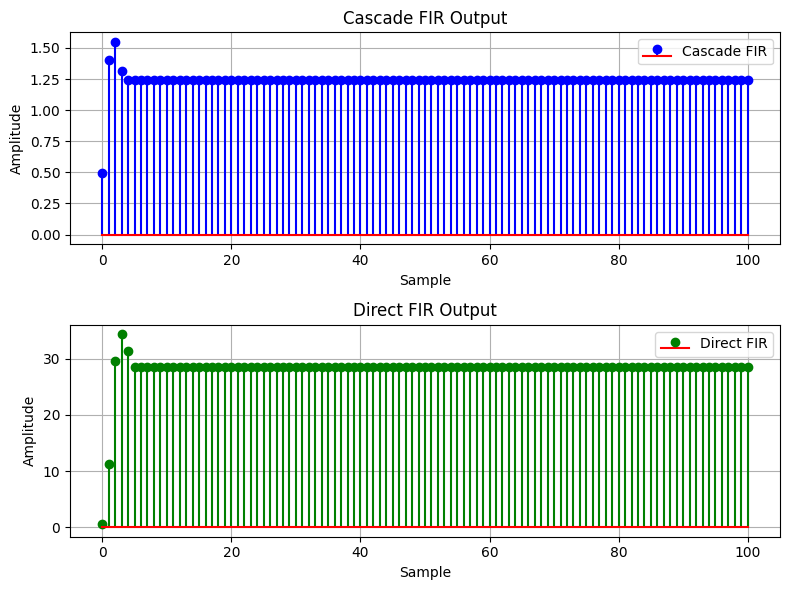

In [156]:
def cplxpair(zeros, tol=1e-8):
    zeros = np.array(zeros, dtype=complex)
    sorted_indices = np.argsort(np.abs(zeros))
    zeros_sorted = zeros[sorted_indices]
    real_parts = np.real(zeros_sorted)
    imag_parts = np.imag(zeros_sorted)

    pairs = []
    used = np.zeros(len(zeros_sorted), dtype=bool)

    for i in range(len(zeros_sorted)):
        if not used[i]:
            pair = [zeros_sorted[i]]
            for j in range(i + 1, len(zeros_sorted)):
                if not used[j] and abs(real_parts[j] - real_parts[i]) < tol and abs(imag_parts[j] + imag_parts[i]) < tol:
                    pair.append(zeros_sorted[j])
                    used[j] = True
                    break
            pairs.extend(pair)
    return np.array(pairs)

def dir2cas(b):
    b0 = b[0]
    b = b / b0
    b0 = b0  # Normalize the gain

    roots = cplxpair(np.roots(b))

    K = len(roots) // 2  # Number of second-order sections
    B = np.zeros((K, 3))  # Coefficients for the numerator
    A = np.zeros((K, 1))  # No denominator coefficients for FIR

    for i in range(0, 2 * K, 2):
        Brow = np.poly(roots[i:i+2])  # Coefficients of the polynomial formed by roots
        B[i // 2, :] = np.real(Brow)

    return b0, B

b0, B = dir2cas(b)
print("b0:", b0)
print("B:", B)

def cas_filter(b0, B, x):
    K = len(B)
    N = len(x)
    w = np.zeros((K + 1, N))
    w[0, :] = lfilter([b0], [1], x)

    for i in range(K):
        w[i + 1, :] = lfilter(B[i, :], [1], w[i, :])  # FIR sections only have a numerator
    y = w[-1, :]
    return y

n = np.arange(0, 101)
u = np.ones_like(n)  # Input signal (step function)

# Apply the cascade FIR filter
h_cas = cas_filter(b0, B, u)
print("h_cas:", h_cas)

# Direct FIR filter output for comparison
h_dir = lfilter(b, [1], u)
print("h_dir:", h_dir)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

axs[0].stem(h_cas, linefmt="b-", markerfmt="bo", basefmt="r-", label="Cascade FIR")
axs[0].set_title("Cascade FIR Output")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].stem(h_dir, linefmt="g-", markerfmt="go", basefmt="r-", label="Direct FIR")
axs[1].set_title("Direct FIR Output")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

### FIR Filter Linear Phase Form

The array b is not symmetric. Making it symmetric...
New symmetric array b: [-1.23713856  3.91360704 11.58347597 11.58347597  3.91360704 -1.23713856]
x = [1 1 1 1 1 1 1] 
y = [-1.23713856  2.67646848 14.25994445 25.84342042 29.75702746 28.5198889
 28.5198889 ]


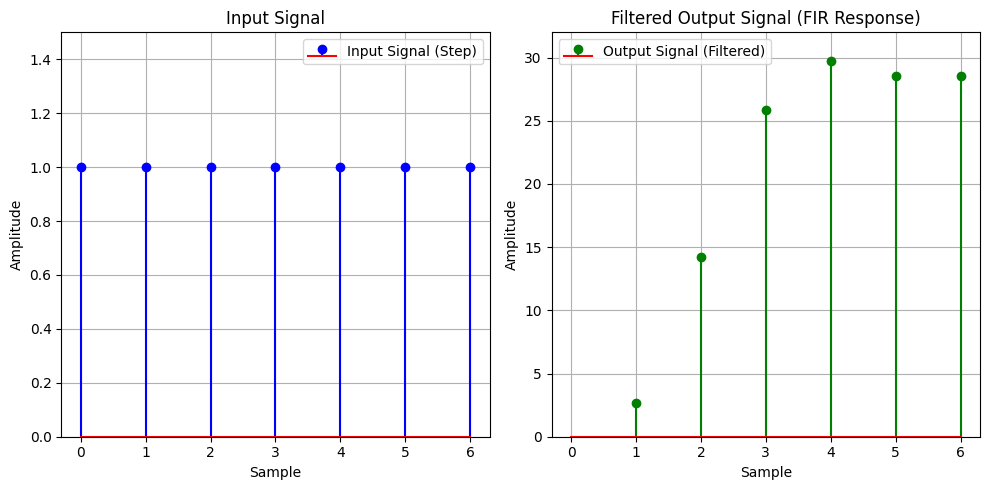

In [157]:
# FIR filter function
def fir_filter(b, x):
    return lfilter(b, 1, x)

# Function to check symmetry and make the array symmetric if it's not
def make_symmetric(b):
    if np.allclose(b, b[::-1]):
        print("The array b is symmetric.")
    else:
        print("The array b is not symmetric. Making it symmetric...")
        # Average the coefficients with their corresponding reverse pair
        b = (b + b[::-1]) / 2
        print("New symmetric array b:", b)
    return b

# Check and make b symmetric if necessary
b = make_symmetric(b)

# Input signal
n = np.arange(7)  # 0 to 6
x = np.ones_like(n)  # Step input (constant value of 1)

# Apply FIR filter
y = fir_filter(b, x)

print("x =", x, "\ny =", y)

# Creating a figure and axis for the plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the input signal
axs[0].stem(n, x, linefmt='b-', markerfmt='bo', basefmt='r-', label='Input Signal (Step)')
axs[0].set_title('Input Signal')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Amplitude')
axs[0].set_xticks(n)
axs[0].set_ylim(0, 1.5)
axs[0].grid()
axs[0].legend()

# Plotting the filtered output signal
axs[1].stem(n, y[:len(n)], linefmt='g-', markerfmt='go', basefmt='r-', label='Output Signal (Filtered)')
axs[1].set_title('Filtered Output Signal (FIR Response)')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Amplitude')
axs[1].set_xticks(n)
axs[1].set_ylim(0, 32)
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

### Cascade Form of Linear Phase FIR Filter

The array b is symmetric.
Roots from polynomial coefficients of FIR filter:
 [-1.        +0.j         -0.65717193-0.75374071j -0.65717193+0.75374071j
  0.18908253+0.j          5.28869603+0.j        ]
B1: [1.         1.65717193 0.65717193]
B2: [ 1.         -4.82060662 -2.59984232  0.65717193]


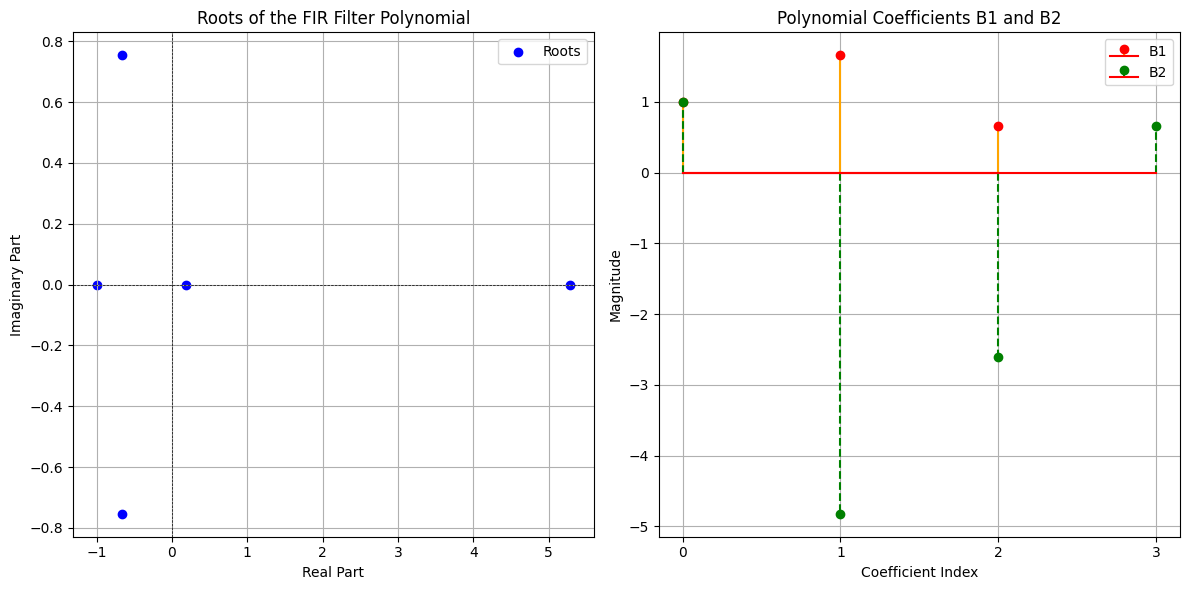

In [158]:
# Function to check symmetry and make the array symmetric if it's not
def make_symmetric(b):
    if np.allclose(b, b[::-1]):
        print("The array b is symmetric.")
    else:
        print("The array b is not symmetric. Making it symmetric...")
        # Average the coefficients with their corresponding reverse pair
        b = (b + b[::-1]) / 2
        print("New symmetric array b:", b)
    return b

# Check and make b symmetric if necessary
b = make_symmetric(b)

# Calculate roots of the polynomial
broots = np.roots(b)
broots = np.sort_complex(broots)

# Print the roots
print("Roots from polynomial coefficients of FIR filter:\n", broots)

# Split the roots into two halves
B1 = np.poly(broots[:len(broots)//2]).real
B2 = np.poly(broots[len(broots)//2:]).real

# Print the polynomial coefficients
print("B1:", B1)
print("B2:", B2)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the roots on the complex plane
plt.subplot(1, 2, 1)
plt.scatter(broots.real, broots.imag, color='blue', marker='o', label='Roots')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.title("Roots of the FIR Filter Polynomial")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid()
plt.legend()

# Plot the polynomial coefficients
plt.subplot(1, 2, 2)
plt.stem(range(len(B1)), B1, linefmt='orange', markerfmt='or', basefmt='r-', label='B1')
plt.stem(range(len(B2)), B2, linefmt='g--', markerfmt='og', basefmt='r-', label='B2')
plt.title("Polynomial Coefficients B1 and B2")
plt.xlabel("Coefficient Index")
plt.ylabel("Magnitude")
plt.xticks(range(max(len(B1), len(B2))))
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()